In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
df=pd.read_csv('Automobile_data.csv')

In [4]:
df.shape

(205, 26)

In [14]:
df.nunique()

symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                187
dtype: int64

In [24]:
df['count']=1

In [50]:
df_new=df.groupby('make').sum().nlargest(10,'count')
df_new

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,count
make,,,,,,,,,,,
toyota,18,3139.3,5501.9,2082.9,1719.1,78115,3802,330.90,880,1053,32
nissan,18,1723.0,3077.8,1171.6,965.4,43207,2302,176.30,486,593,18
mazda,19,1649.3,2903.7,1115.0,907.1,39063,1751,178.30,437,543,17
honda,8,1226.3,2090.0,837.0,692.1,27258,1291,119.80,395,461,13
mitsubishi,24,1239.6,2184.4,848.3,659.0,30965,1538,104.80,324,405,13
subaru,6,1154.1,2026.3,779.4,645.0,27795,1285,105.80,316,369,12
volkswagen,20,1171.3,2070.4,787.4,662.2,28118,1287,163.50,343,419,12
peugot,0,1212.2,2102.5,752.3,629.0,35431,1494,154.00,247,293,11
volvo,-14,1171.3,2076.8,747.6,618.6,33417,1565,112.50,233,284,11


# highest make

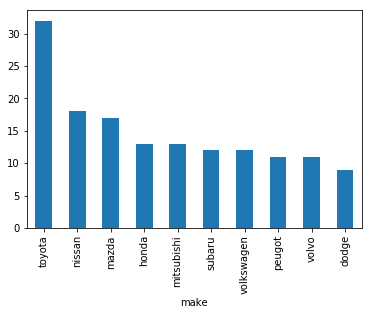

In [52]:
df_new['count'].plot(kind='bar')

Text(0.5, 1.0, 'No of cars by make')

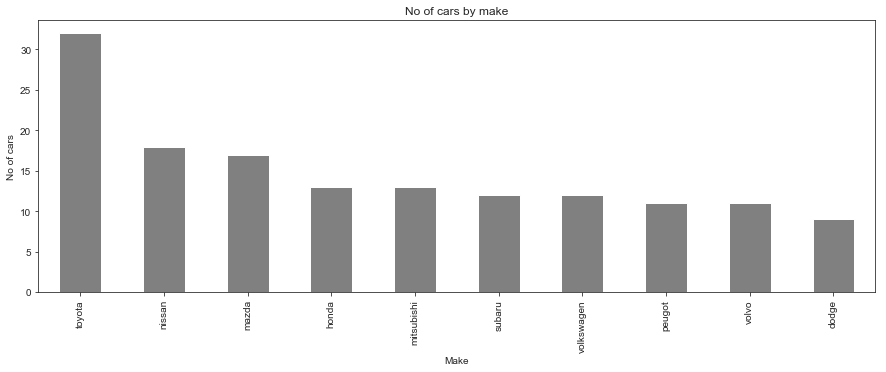

In [190]:
# Correct answer
df['make'].value_counts().nlargest(10).plot(kind='bar',figsize=(15,5),color='grey')
plt.xlabel('Make')
plt.ylabel('No of cars')
plt.title('No of cars by make')

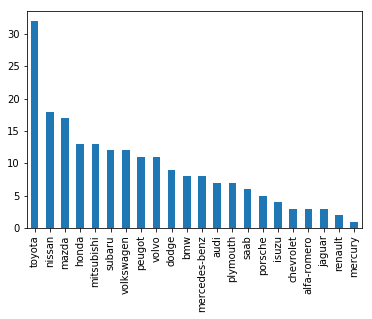

In [69]:
df['make'].value_counts().plot(kind='bar')

# which drive has highest no of vehicles.

Text(0.5, 1.0, 'no of vehicles by wheel drive')

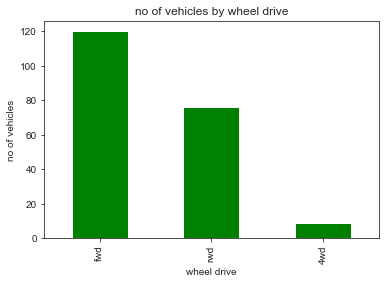

In [189]:
# Correct answer
df['drive-wheels'].value_counts().plot(kind='bar',color='green')
plt.xlabel('wheel drive')
plt.ylabel('no of vehicles')
plt.title('no of vehicles by wheel drive')

# most expensive car and minimum car

In [89]:
df['price']=pd.to_numeric(df['price'], errors='coerce')


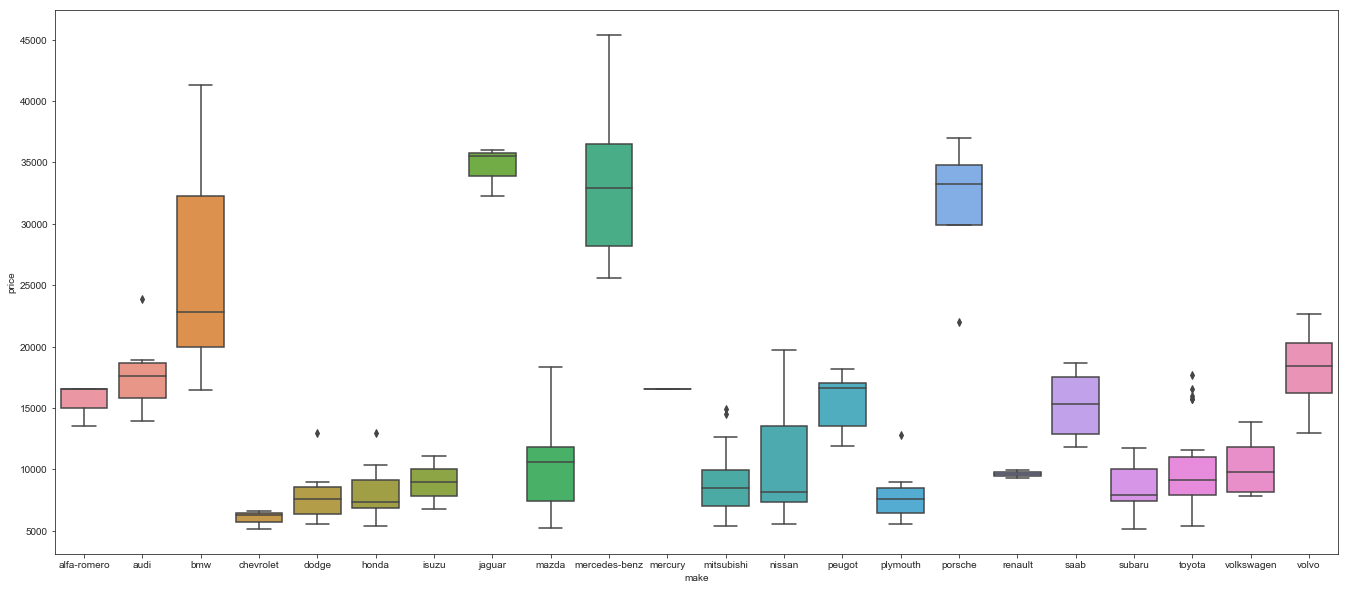

In [200]:
plt.rcParams['figure.figsize']=(23,10)
sns.boxplot(x='make',y='price',data=df)



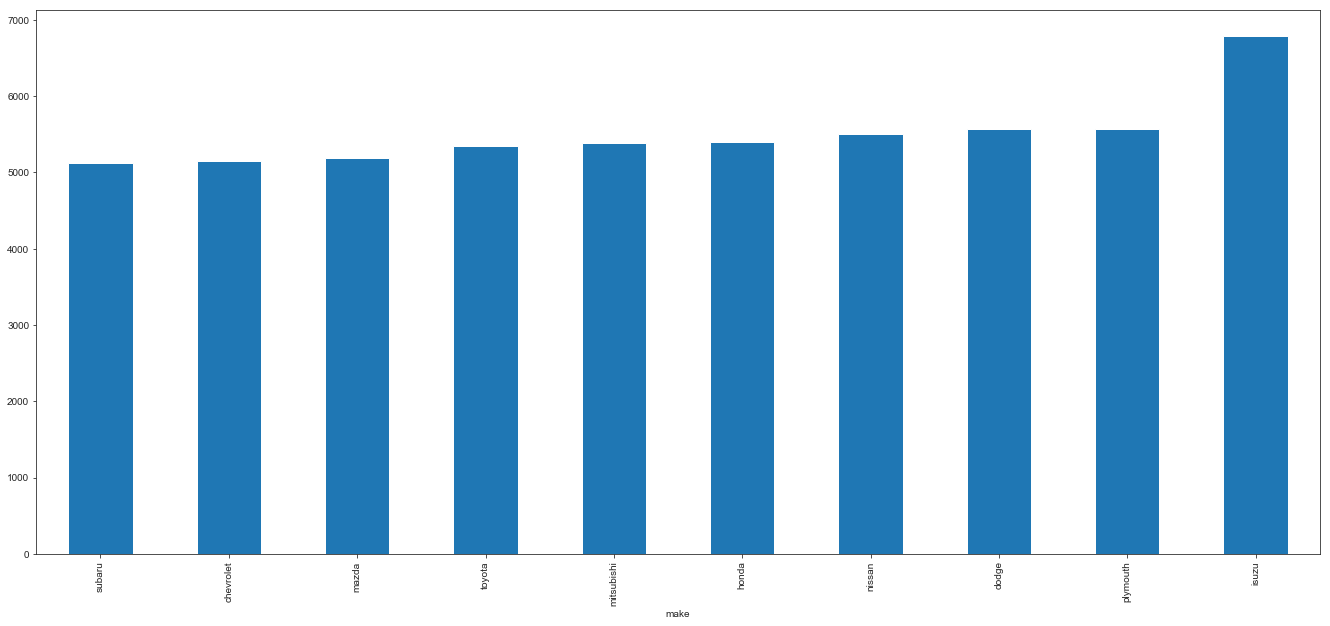

In [215]:
# OR 
df.groupby('make').price.min().nsmallest(10).plot(kind='bar')

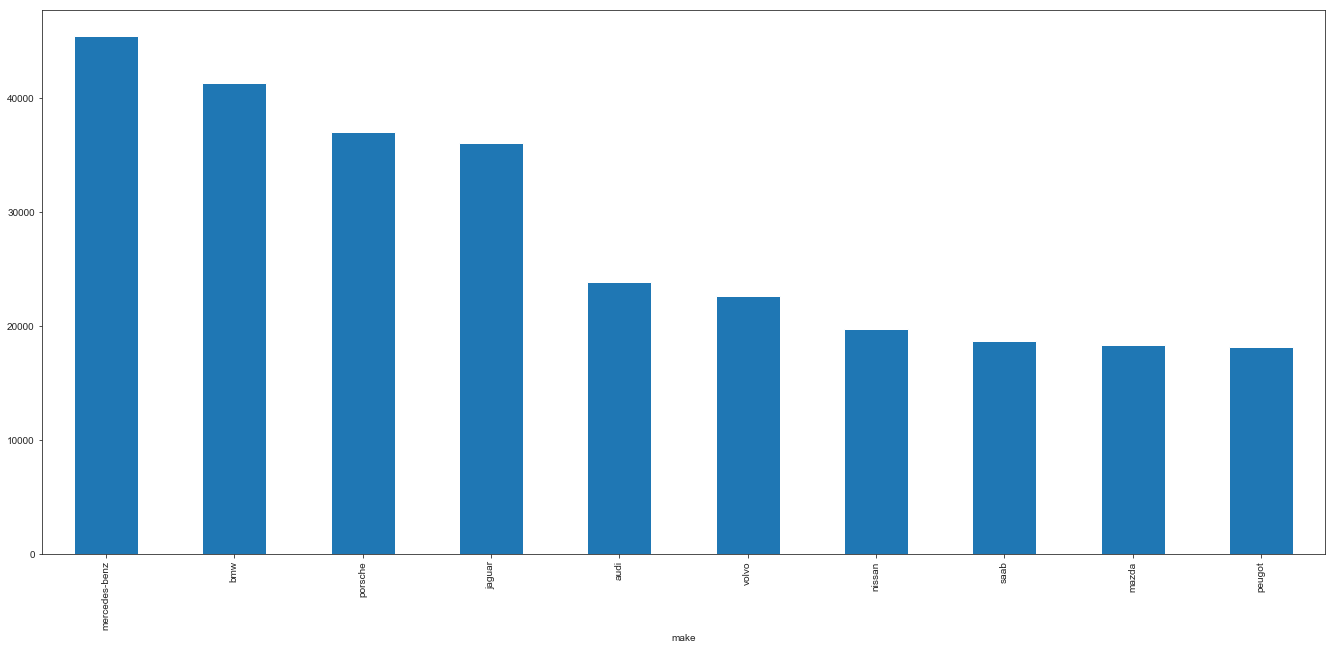

In [216]:
# or
df.groupby('make').price.max().nlargest(10).plot(kind='bar')

# curb weight on cars are distributed between

In [174]:
df['curb-weight'].mean()

2555.5658536585365

In [175]:
df['curb-weight'].std()

520.6802035016389

In [176]:
axvline=2555-520

2035

In [177]:
2555+520

3075

Text(0.5, 1.0, 'curb weight between for most vehicles')

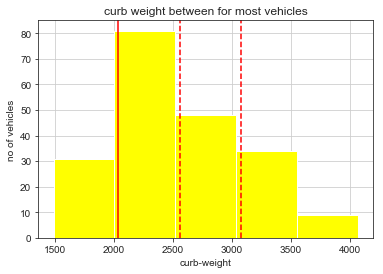

In [76]:
sns.set_style('ticks')
plt.axvline(x=2035, color='r')
plt.axvline(x=2555, color='r', linestyle= '--')
plt.axvline(x=3075, color='r', linestyle= '--')
df['curb-weight'].hist(bins=5,color='yellow')
plt.xlabel('curb-weight')
plt.ylabel('no of vehicles')
plt.title('curb weight between for most vehicles')


## factors affecting drive wheel

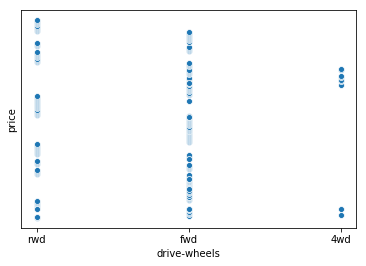

In [9]:
plt.yticks(np.arange(300, 300000, 1000))
sns.scatterplot(x='drive-wheels',y='price',data=df)

## OUTliers

In [10]:

automobile[np.abs(automobile.horsepower-automobile.horsepower.mean())<=(3*automobile.horsepower.std())]

NameError: name 'automobile' is not defined

In [25]:
hp=df['horsepower'].loc[df['horsepower']!='?']
#automobile['horsepower'].loc[automobile['horsepower'] != '?']

In [28]:
hpmean=hp.astype(str).astype(int).mean()

In [31]:
df['horsepower']=df['horsepower'].replace('?',hpmean).astype(int)

In [38]:
hstd=df['horsepower'].std()

In [40]:
hmean=df['horsepower'].mean()

In [42]:
op=df[np.abs(df.horsepower-df.horsepower.mean())<=(3*df.horsepower.std())]

In [51]:
aftrout=df[np.abs(df.horsepower-hmean)<=(3*hstd)]

In [53]:
aftrout.shape

(203, 26)

In [63]:
pd.set_option('display.max_columns',30)

In [65]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


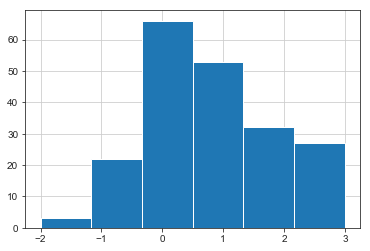

In [77]:
# remove the records which are having the value '?'
#df['num-of-doors'].loc[df['num-of-doors'] == '?']
#df = df[df['num-of-doors'] != '?']
df['symboling'].hist(bins=6)

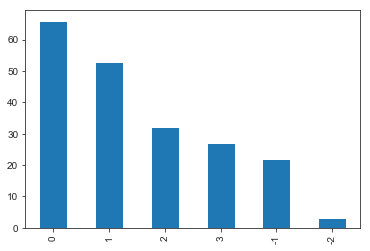

In [85]:
df['symboling'].value_counts().plot(kind='bar')

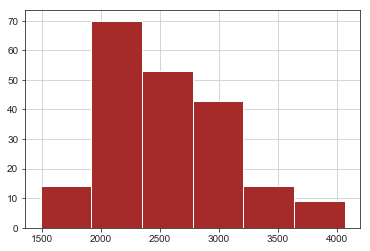

In [90]:
df['curb-weight'].hist(bins=6,color='brown')

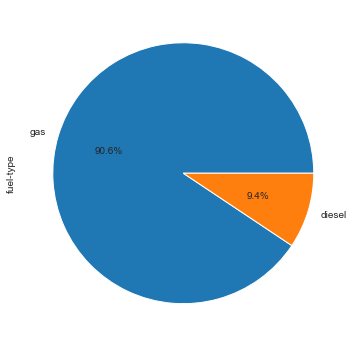

In [102]:
df['fuel-type'].value_counts().plot.pie(figsize=(6,6),autopct='%1.1f%%')

In [104]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

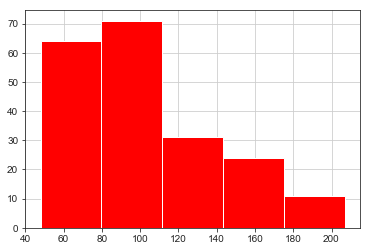

In [121]:
plt.grid(True)
df.horsepower[np.abs(df.horsepower-df.horsepower.mean())<=(3*df.horsepower.std())].hist(bins=5,color='red')

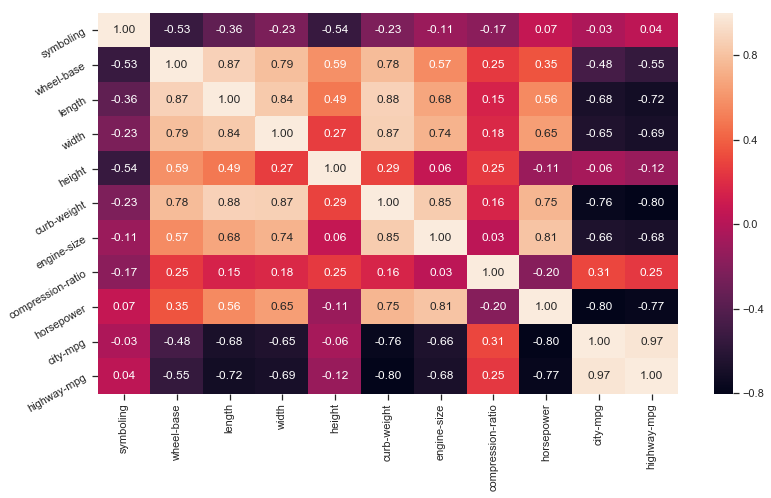

In [128]:
import seaborn as sns
corr = df.corr()
sns.set_context("notebook",  rc={"lines.linewidth": 2.5},font_scale=1.0)
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [142]:
#plt.rcParams['figure.figsize']=(10,5)
#ax = sns.boxplot(x="drive-wheels", y="price", data=df)
df['price'].str.isnumeric().sum()

199